You can ignore this, this is just initial setup 

In [3]:
import pandas as pd
import seaborn as sns
import math


**Section 3.4**

PROBLEM 17 a:

Calculate bins using squareroot of number of rows for number of bins. 

In [ ]:
from pandas.api.types import is_numeric_dtype
#Initialize dataframe, sort by closing price
NasdaqDF = pd.DataFrame({
    'Stock' : ['Citigroup (C)','Pfizer(PFE)','Herbalife(HLF)', 'JP Morgan Chase(JPM)', 'Intel(INTC)','Walmart(WMT)','Microsoft(MSFT)','PepsiCo(PEP)','General Motors(GM)','Verizon Communications(VZ)','Southwest Airlines(LUV)','Sprint Nextel(S)','Yahoo! Inc(YHOO)','International Business Machines(IBM)'],
    'Closing Price($)' : [34.7,22.34,69.72,44.34,28.07,60.67,31.52,66.17,24.81,37.66,8.31,2.76,15.07,205.47]
}).set_index('Stock').sort_values('Closing Price($)')

def calculateBins(df = pd.DataFrame(), column = ""):
    if is_numeric_dtype(df[column]):
        #we aren't going to assume it's already sorted, sort dataframe before starting.
        df = df.sort_values(column)
        
        bins = [0]
        numOfClasses = round(math.sqrt(df.size))
        classWidth = math.ceil((df[column].iloc[df.size-1] - df[column].iloc[0]) / numOfClasses)
        #indexing starts at 0 so I added a 1 to make sure the number of bins remains correct while it iterates
        for i in range(numOfClasses + 1):
            bins.append(classWidth + bins[i])
    return bins

bins  = calculateBins(NasdaqDF, 'Closing Price($)')
df = NasdaqDF.apply(pd.Series.value_counts, bins = bins).sort_index()
df


,Closing Price($)
"(-0.001, 51.0]",10
"(51.0, 102.0]",3
"(102.0, 153.0]",0
"(153.0, 204.0]",0
"(204.0, 255.0]",1


For this output the lower limit is an open interval so (-.001, 51.0] is actually 0 to 51 and (51, 102] approaches from the upper side but does not include 51.

PROBLEM 17 b

<Axes: xlabel='Closing Price($)', ylabel='Count'>

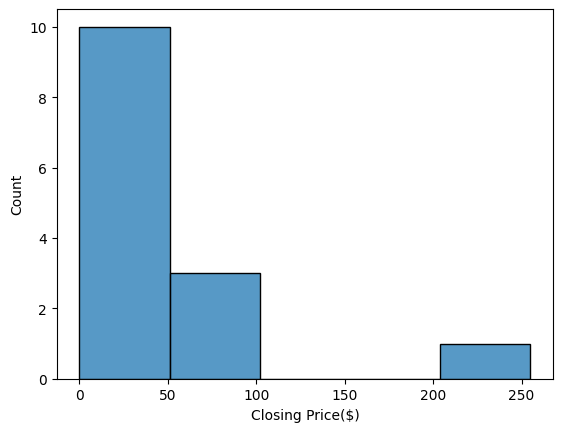

In [5]:
sns.histplot(NasdaqDF, x='Closing Price($)', bins= bins)

PROBLEM 19 a: 

Initialize the dataframe, sort by calories descending:

In [6]:
calDf = pd.DataFrame({ 'Calories' : [34,18,33,25,30,42,40,33,39,40,45,35,45,25,27,23,32,33,47,23,27,32,30,28,36]}).sort_values('Calories')

I will reuse my frequency distribution function, spent way too long on it not to. 

In [7]:

bins  = calculateBins(calDf, 'Calories')
calBins = calDf.apply(pd.Series.value_counts, bins = bins).sort_index()
calBins.head()

,Calories
"(-0.001, 6.0]",0
"(6.0, 12.0]",0
"(12.0, 18.0]",1
"(18.0, 24.0]",2
"(24.0, 30.0]",7


PROBLEM 19 b:

This loops through calBins, calculates the relative frequency for each row and then creates a new dataframe name relFreqDf based off of calBins. then adds a column for the relative frequency to hold the relative frequency data.

In [8]:
totalOccurances = calDf['Calories'].sum()
relFreqDf = calBins
relFreq = []

for frequency in calBins['Calories']:
    relFreq.append(frequency/totalOccurances)

relFreqDf['Relative Frequency'] = relFreq
relFreqDf

,Calories,Relative Frequency
"(-0.001, 6.0]",0,0.000000
"(6.0, 12.0]",0,0.000000
"(12.0, 18.0]",1,0.001217
"(18.0, 24.0]",2,0.002433
"(24.0, 30.0]",7,0.008516
"(30.0, 36.0]",8,0.009732


PROBLEM 21 a:

**WRITTEN ANSWER: The data possesses a ratio and interval level of measurement.**

Initialize and sort dataframe.

In [9]:
dailyChargesDf = pd.DataFrame({
    'Daily Charges' : [125,135,148,156,248,215,156,148,135,149,
                 178,156,135,125,214,256,258,265,156,148,
                 123,147,189,199,189,248,215,259,158,235,
                 268,269,158,198,147,258,269,239,288,199,
                 179,179,189,169,258,178,257,249,259,259]
}).sort_values('Daily Charges')
for i in dailyChargesDf['Daily Charges']:
    print(i)

123
125
125
135
135
135
147
147
148
148
148
149
156
156
156
156
158
158
169
178
178
179
179
189
189
189
198
199
199
214
215
215
235
239
248
248
249
256
257
258
258
258
259
259
259
265
268
269
269
288


PROBLEM 21 b:

Using python library stemgraphic:

(<Figure size 750x500 with 1 Axes>, <Axes: >)

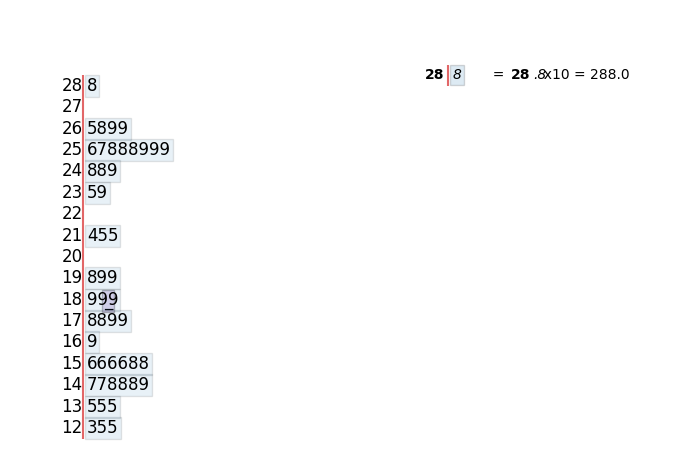

In [10]:
import stemgraphic
stemgraphic.stem_graphic(dailyChargesDf['Daily Charges'], aggregation=False, scale = 10) 


PROBLEM 21 c:

**WRITTEN ANSWER: It looks like a bimodal distribution**

**SECTION 4.1**

PROBLEM 22 a

Find the mean:

In [11]:
csvDf = pd.read_csv('MTA2.csv').set_index('Year')
csvDf['On Course'].mean()

7.450952380952383

PROBLEM 22 b:

Find the median:

In [12]:
csvDf['On Course'].median()

7.68

PROBLEM 22 c:

Find the mode

In [13]:
csvDf['On Course'].mode()


0      0.11
1      0.55
2      0.61
3      0.89
4      2.07
5      2.29
6      2.38
7      2.93
8      6.37
9      6.70
10     7.68
11     7.74
12     7.77
13     8.29
14     9.12
15    11.03
16    11.94
17    11.99
18    12.09
19    21.02
20    22.90
Name: On Course, dtype: float64

**Pandas is returning 21 modes because there is no mode**

PROBLEM 22 d:

In [14]:
from scipy import stats
print("0.1 Trimmed Mean: " + str(stats.trim_mean(csvDf,0.1)[0]))
print("Mean: " + str(csvDf['On Course'].mean()))
print("Median: " + str(csvDf['On Course'].median()))

0.1 Trimmed Mean: 6.581764705882353
Mean: 7.450952380952383
Median: 7.68


**WRITTEN ANSWER: Trimmed mean is less than median and mode meaning that there are high end outliers**

PROBLEM 22 e:

**WRITTEN ANSWER: Median is more than mean meaning it is negative skewed**

**SECTION 4.2**

PROBLEM 14 a, b, c:

In [15]:
batteryFailures = pd.DataFrame({
    "years until failure": [5,3,4,6,2,5,7,10,8,4]
})
min = batteryFailures["years until failure"].min()
max = batteryFailures["years until failure"].max()
print("sample variance: "+ str(batteryFailures['years until failure'].var()))
print("standard deviation: " + str(batteryFailures["years until failure"].std()))

print("range: [" + str(min) + "," + str(max) + "]")

sample variance: 5.822222222222222
standard deviation: 2.4129281427805145
range: [2,10]



PROBLEM 14 d:

**WRITTEN ANSWER: Could be from manufacturing defects, climate, operator error, or car electrical system differences**

**SECTION 5.1**

PROBLEM 22 a

In [16]:
rolls = pd.DataFrame({
    "rolls" : [1,2,1,3,1,4,1,5,6,3,1,3,1,5,1,2,1,3,1,2,1,2,2,1,3,5,1,2,1,2,1,4,6],
})

bins  = calculateBins(rolls, 'rolls')
rollBins = rolls.apply(pd.Series.value_counts, bins = bins).sort_index()


totalOccurances = rollBins['rolls'].sum()
relFreqDf = rollBins
relFreq = []

for frequency in rollBins['rolls']:
    relFreq.append(frequency/totalOccurances)

df = pd.DataFrame({
    "roll outcome" : [1,2,3,4,5,6],
    "relative frequency" : [relFreq[0], relFreq[1],relFreq[2],relFreq[3],relFreq[4], relFreq[5]],
}).set_index("roll outcome")
df

,relative frequency
roll outcome,
1,0.424242
2,0.212121
3,0.151515
4,0.060606
5,0.090909
6,0.060606


Probabilities:

1: 42%

2: 21%

3: 15%

4: 6%

5: 9%

6: 6%